In [2]:
cd ..

/home/thom/Documents/research/RandomBridge


In [3]:
%matplotlib inline

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from pdb import pm, set_trace
import utils.PyRandomUtils as pru

In [174]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, base=2):
        self.stream = self.data_stream()
        self.base = base

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(10,3))
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=100, 
                                           init_func=self.setup_plot, blit=True,
                                          repeat_delay=0.2, frames=150)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, c = next(self.stream)
        self.scat = self.ax.scatter(x, y, c=c, animated=True)
        self.ax.axis([-0, 1,-1, 1])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        halton = pru.HaltonGen(self.base)
        i = 0
        x = [halton.rand()]
        y = [0]
        c = [150]
        while True:
            i += 1
            x.append(halton.rand())
            y.append(0)
            c.append(i)
            
            if i == 50:
#                 set_trace()
                pass
            yield x, y, c

    def update(self, i):
        """Update the scatter plot."""
        x, y, c = next(self.stream)

        
#         set_trace()
        
        # Set x and y data...
        self.scat.set_offsets(np.array([x,y]).T)
        # Set sizes...
#         self.scat._sizes = 300 * abs(data[2])**1.5 + 100
        # Set colors..
        self.scat.set_array(np.array(c))
        
        vmax     = np.max(x)
        vmin     = np.min(x)
        levels   = np.linspace(vmin, vmax, 200, endpoint = True)
#         cf = self.ax.contourf([(x[i], y[i]) for i in range(len(x))], vmax=vmax, vmin=vmin, levels=levels)
#         ax.cla()
#         plt.colorbar()
    
 

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def show(self):
        plt.show()


In [204]:
h = pru.HaltonGen(2)
for i in range(16):
    print(h.rand())

0.5
0.25
0.75
0.125
0.625
0.375
0.875
0.0625
0.5625
0.3125
0.8125
0.1875
0.6875
0.4375
0.9375
0.03125


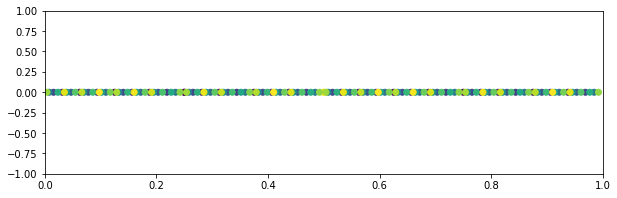

In [177]:
a = AnimatedScatter(2)
HTML(a.ani.to_html5_video())

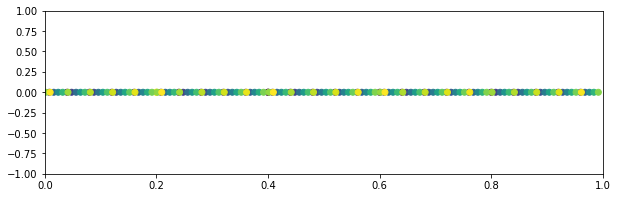

In [178]:
a = AnimatedScatter(5)
HTML(a.ani.to_html5_video())

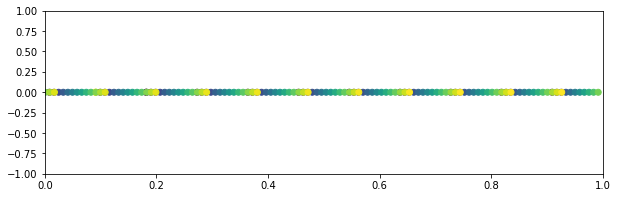

In [179]:
a = AnimatedScatter(11)
HTML(a.ani.to_html5_video())

In [181]:

from numpy.core._rational_tests import lcm

In [203]:
np.lcm.reduce(range(2,14))

360360

420